In [1]:
import pandas as pd
import plotly.express as px
data = pd.read_csv('BASE DATOS 1.csv')
data.head()

,Index,Country,Scope,Jurisdiction,Type of Law,Product Type,Application
0,1,Afghanistan,National,Afghanistan,Ban,Bag,Unknown
1,2,Albania,National,Albania,Ban,Bag,Unknown
2,3,Algeria,National,Algeria,Other,Bag,Import
3,4,Andorra,State,Andorra,Ban,Bag,Unknown
4,5,Antigua & Barbuda,National,Antigua & Barbuda,Ban,Bag,"Retail, Manufacture, Distribution, Import, Use"


Definimos las variables que van a ser necesarias para construir las visualizaciones.

In [2]:
country_column = 'Country'
type_of_law_column = 'Type of Law'
application_column = 'Application'

Tuve que dejar todos los datos de las variables en mayúscula, ya que habían datos en minúscula y otras en mayúscula, y se repetían en las vizualizaciones.

In [3]:
data[country_column]= data[country_column].str.capitalize()
data[type_of_law_column]= data[type_of_law_column].str.capitalize()
data[application_column]= data[application_column].str.capitalize()
data[type_of_law_column].unique()

array(['Ban', 'Other', 'Fee', 'Ban+fee', 'Comprehensive',
       'Ban/fee hybrid'], dtype=object)

Visualización 01

Acontinuación, intentamos ordenar los datos correspondientes a la variable de aplicación. Dejamos que los datos que se repiten más de una vez aparezcan, y aquellos que se repiten solo una vez, los agrupamos en la categoría de "Otros".

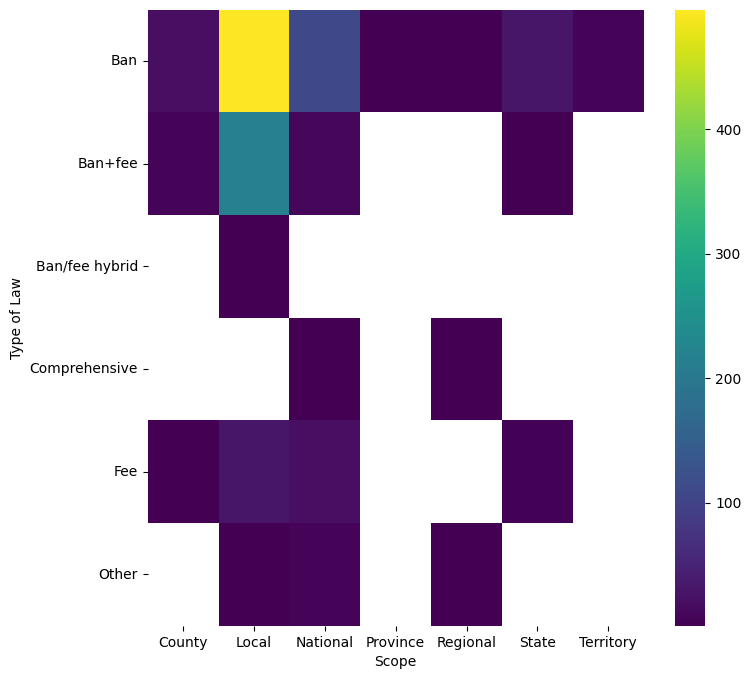

In [4]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
# data = pd.read_csv('BASE DATOS 1.csv')

# Ajusta el tamaño de la figura
plt.subplots(figsize=(8, 8))

# Crea un DataFrame para el gráfico de mapa de calor
df_2dhist = pd.DataFrame({
    x_label: grp['Type of Law'].value_counts()
    for x_label, grp in data.groupby('Scope')
})

# Crea el mapa de calor usando Seaborn
sns.heatmap(df_2dhist, cmap='viridis')

# Etiqueta del eje x
plt.xlabel('Scope')

# Etiqueta del eje y
_ = plt.ylabel('Type of Law')

# Muestra el gráfico
plt.show()


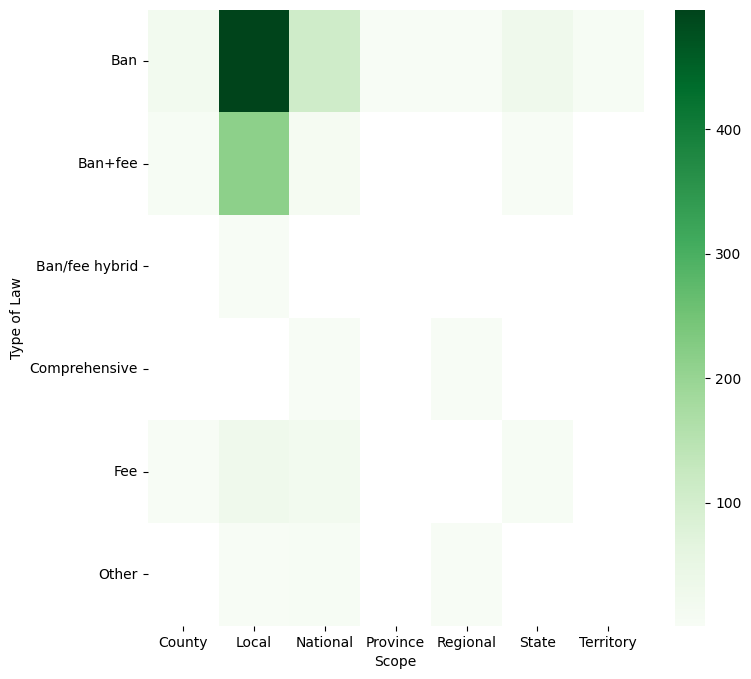

In [5]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

# Descomenta la línea siguiente si estás cargando datos desde un archivo CSV
# data = pd.read_csv('BASE DATOS 1.csv')

# Ajusta el tamaño de la figura
plt.subplots(figsize=(8, 8))

# Crea un DataFrame para el gráfico de mapa de calor
df_2dhist = pd.DataFrame({
    x_label: grp['Type of Law'].value_counts()
    for x_label, grp in data.groupby('Scope')
})

# Crea el mapa de calor usando Seaborn
sns.heatmap(df_2dhist, cmap='Greens')

# Etiqueta del eje x
plt.xlabel('Scope')

# Etiqueta del eje y
_ = plt.ylabel('Type of Law')

# Guarda la imagen como un archivo PNG
plt.savefig('heatmap.png')

# Muestra el gráfico (opcional)
plt.show()

In [6]:
import pandas as pd
import plotly.express as px

# Descomenta la línea siguiente si estás cargando datos desde un archivo CSV
# data = pd.read_csv('BASE DATOS 1.csv')

# Crea un DataFrame para el gráfico de mapa de calor
df_2dhist = pd.DataFrame({
    x_label: grp['Type of Law'].value_counts()
    for x_label, grp in data.groupby('Scope')
}).fillna(0)  # Rellenamos NaN con 0 para que Plotly Express no tenga problemas

# Crea el mapa de calor usando Plotly Express
fig = px.imshow(df_2dhist.values,
                labels=dict(x="Scope", y="Type of Law", color="Count"),
                x=df_2dhist.columns,
                y=df_2dhist.index,
                color_continuous_scale="Blugrn")

# Actualiza el diseño del gráfico
fig.update_layout(title='Heatmap', xaxis_title='Scope', yaxis_title='Type of Law')

# Guarda la imagen como un archivo HTML
fig.write_html('heatmap.html')

Visualización_02

In [ ]:
paises_con_ban["Tipo de ley"] = "Ban"
paises_con_fee["Tipo de ley"] = "Fee"
paises_con_banfee["Tipo de ley"] = "Ban+Fee"

Dejé solo la aplicación en el retail, ya que es donde rige la normativa en Chile.

In [15]:
Retail= data[data["Application"]=="Retail"]
Retail

,Index,Country,Scope,Jurisdiction,Type of Law,Product Type,Application
6,7,Argentina,Local,El Bolson,Ban,Bag,Retail
8,9,Argentina,State,Buenos Aires Province,Ban,Bag,Retail
9,10,Argentina,State,Chubut Province,Ban,Bag,Retail
10,11,Argentina,State,Mendoza Province,Ban,Bag,Retail
11,12,Aruba,Local,Aruba,Ban,Bag,Retail
...,...,...,...,...,...,...,...
950,983,United states,Territory,Guam,Ban,Bag,Retail
951,984,United states,Territory,Northern Mariana Islands,Ban,Bag,Retail
952,985,United states,Territory,Puerto Rico,Ban,Bag,Retail
953,986,United states,Territory,U.S. Virgin Islands,Ban,Bag,Retail


Dejé solo el scope Nacional, ya que es el que rige en Chile, y así puedo compararlo con otros países que estén igual.

In [16]:
Nacional_previa= Retail[Retail["Jurisdiction"]== Retail["Country"]]
Nacional = Nacional_previa[Nacional_previa["Product Type"]=="Bag"]
Nacional

,Index,Country,Scope,Jurisdiction,Type of Law,Product Type,Application
11,12,Aruba,Local,Aruba,Ban,Bag,Retail
24,26,Austria,State,Austria,Ban,Bag,Retail
74,77,Chile,Local,Chile,Ban,Bag,Retail
78,81,China,National,China,Fee,Bag,Retail
80,83,Colombia,National,Colombia,Ban+fee,Bag,Retail
81,84,Congo,National,Congo,Ban+fee,Bag,Retail
86,89,Denmark,National,Denmark,Fee,Bag,Retail
138,142,Israel,National,Israel,Ban+fee,Bag,Retail
165,170,Moldova,National,Moldova,Ban,Bag,Retail
166,171,Monaco,National,Monaco,Ban,Bag,Retail


Esta tabla es la que utilicé para ver qué códigos de cada país debía incluir en el mapa.